# 단변량분석_숫자형변수

<img src='https://github.com/DA4BAM/image/blob/main/%EB%8B%A8%EB%B3%80%EB%9F%89%EB%B6%84%EC%84%9D.png?raw=true' width=400/>

# 1.환경준비

## (1) 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## (2) 데이터 로딩

### 1) titanic
* url :  'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'

**[titanic_simple 데이터 셋 정보]**

- PassengerId : 승객번호
- Survived : 생존여부(1:생존, 0:사망)
- Pclass : 객실등급(1:1등급, 2:2등급, 3:3등급)
- Name : 승객이름
- Sex : 성별(male, female)
- Age : 나이
- Fare : 운임($)
- Embarked : 승선지역(Southhampton, Cherbourg, Queenstown)

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton


### 2) New York Air Quality

* url : https://bit.ly/3qmthqZ

**[airquality 데이터 셋 정보]**

- Ozone: 오존 농도  
- Solar.R: 태양복사량
- Wind: 풍속
- Temp: 기온
- Month: 월
- Day: 일

In [2]:
air = pd.read_csv('https://bit.ly/3qmthqZ')
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


# 2.수치화

## (1) 대푯값

### 1) 평균

* 산술평균

In [4]:
a = [1, 2, 3, 3, 4, 4, 4, 5, 6, 7, 8, 9, 10, 11, 15, 17, 17, 19, 20, 25, 30]
print(np.mean(a))

10.476190476190476


In [9]:
sum(titanic['Fare'])/len(titanic['Fare'])

32.2042079685746

In [5]:
# 시리즈.mean()
titanic.Fare.mean()

32.2042079685746

In [10]:
titanic['Fare'].mean()

32.2042079685746

* 조화평균
    * a, b : [[두 수(a,b)의 역수]의 평균]의 역수
    * 분자가 같고, 분모가 다른 두 숫자에 대한 평균 계산시 사용 (추후 모델 평가시 중요하게 사용됩니다. 여기서는 가볍게~~)
    * 1) 두 수의 역수의 평균 :
$\frac{(\frac{1}{a}+\frac{1}{b})}{2}$
    * 2) 1)의 역수 :
$\frac{2*a*b}{(a+b)}$

In [12]:
# 거리 20 km
# 갈때 속력 60 km
# 올때 속력 80 km
# 평균 속력은?

a1, a2 = 60, 80
hm = 2*a1*a2 / (a1 + a2)
print(hm)

68.57142857142857


### 2) 중앙값(중위수, median)  

자료의 순서상 가운데 위치한 값

In [13]:
# np.median함수의 경우 list, array, series등을 변수로 받을 수 있음. 
a = [1, 2, 3, 3, 4, 4, 4, 5, 6, 7, 8, 9, 10, 11, 15, 17, 17, 19, 20, 25, 30]
print(np.median(a))

8.0


In [14]:
# series자체에 내장된 메서드 median. list, array 등에서는 불가능. 
titanic.Fare.median()

14.4542

### 3) 최빈값

* 자료 중에서 가장 빈번하게 나타나는 값(빈도가 높은 값)
* 이산형 정보

In [15]:
a = [1, 2, 3, 3, 4, 4, 4, 5, 6, 7, 8, 9, 10, 11, 15, 17, 17, 19, 20, 25, 30]
a = pd.Series(a)
a.mode()

0    4
dtype: int64

In [16]:
titanic.Fare.mode()

0    8.05
dtype: float64

### 4) 4분위수

![](https://mblogthumb-phinf.pstatic.net/20150702_229/jevida_1435803723327eyeeG_PNG/3.png?type=w2)

In [17]:
a = [1, 2, 3, 3, 4, 4, 4, 5, 6, 7, 8, 9, 10, 11, 15, 17, 17, 19, 20, 25, 30]
print(np.percentile(a, [0, 25, 50, 75, 100]))

[ 1.  4.  8. 17. 30.]


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

연습문제를 풀어 봅시다.

In [24]:
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [28]:
# titanic의 Age에 대해서 다음을 각각 확인해 봅시다.
titanic['Age'].describe()
# 평균

titanic['Age'].mean()
# 최빈값
titanic['Age'].mode()

# 중앙값
titanic['Age'].median()

# 4분위수 (nan값 있으면 안된다~)
tmp = titanic.loc[titanic['Age'].isna() == False]
print(np.percentile(tmp['Age'],[0,25,50,75,100]))

[ 0.42  20.125 28.    38.    80.   ]


In [35]:
# air의 Ozone에 대해서 다음을 각각 확인해 봅시다.

# 평균
air['Ozone'].mean()

# 최빈값
air['Ozone'].mode()

# 중앙값
air['Ozone'].median()

# 4분위수
np.percentile(air['Ozone'],[0,25,50,75,100])


array([  1.,  20.,  34.,  59., 168.])

## (2) 기초통계량

### 1) 시리즈.describe()

In [36]:
# 왼쪽으로 완전 치우친 그래프가 나올 것이라 추측할 수 있다. 
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### 2) 데이터프레임.describe()

In [37]:
# 데이터프레임 각 변수들의 기초통계량을 조회해 봅시다.
titanic.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208
std,257.353842,0.486592,0.836071,14.526497,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


In [38]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,Southhampton
freq,NaN,NaN,NaN,1,577,NaN,NaN,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,31.000000,NaN


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

air 데이터프레임에 대해서 기초 통계량을 구하고, 내용을 파악해 봅시다.

In [39]:
air.describe()

,Ozone,Solar.R,Wind,Temp
count,153.000000,146.000000,153.000000,153.000000
mean,42.052288,185.931507,9.957516,77.882353
std,30.156127,90.058422,3.523001,9.465270
min,1.000000,7.000000,1.700000,56.000000
25%,20.000000,115.750000,7.400000,72.000000
50%,34.000000,205.000000,9.700000,79.000000
75%,59.000000,258.750000,11.500000,85.000000
max,168.000000,334.000000,20.700000,97.000000



# 3.시각화

In [45]:
titanic['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

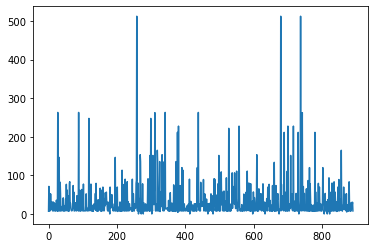

In [44]:
plt.plot(titanic['Fare'])

## (1) 히스토그램

1) 히스토그램 기본

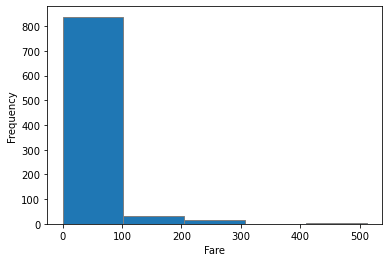

In [46]:
plt.hist(titanic.Fare, bins = 5, edgecolor = 'gray')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

2) 구간의 갯수를 조정해 봅시다.

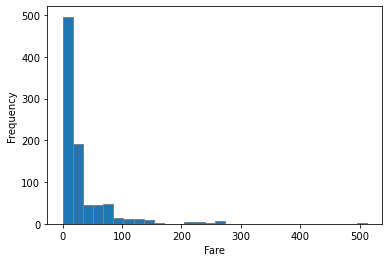

In [43]:
plt.hist(titanic.Fare, bins = 30, edgecolor = 'gray')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

3) 구간 값과 갯수를 확인해 봅시다.

* 결과를 저장하면, 구간과 빈도수를 확인할 수 있습니다.
    * 히스토그램을 저장하면 튜플.
    * 튜플 안에는 넘파이 어레이가 2개로 구성됨.
    * 첫번째 넘파이 어레이는 빈도수,
    * 두번째는 구간 값.


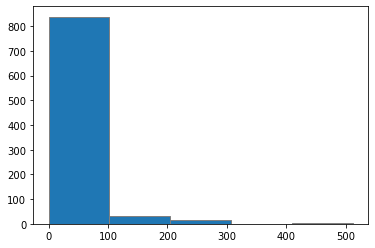

(array([838.,  33.,  17.,   0.,   3.]), array([  0.     , 102.46584, 204.93168, 307.39752, 409.86336, 512.3292 ]), <BarContainer object of 5 artists>)
<class 'tuple'>
--------------------------------------------------
빈도수 :  [838.  33.  17.   0.   3.]
구간값 :  [  0.      102.46584 204.93168 307.39752 409.86336 512.3292 ]


In [22]:
hist1 = plt.hist(titanic.Fare, bins = 5, edgecolor = 'gray')
plt.show()

print(hist1)
print(type(hist1))
print('-' * 50)
print('빈도수 : ', hist1[0])
print('구간값 : ', hist1[1])

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문제1] titanic의 Age에 칼럼에 대해 히스토그램을 그려 봅시다.
* bins = 8, 16, 32, 64

(array([14., 10., 16.,  4.,  3.,  3., 12.,  2.,  4.,  1.,  8.,  6., 17.,
        13., 51., 15., 25., 27., 46., 24., 18., 18., 47., 25., 19., 20.,
        15., 34., 22.,  7., 11., 27.,  8., 13.,  5., 21.,  5.,  9.,  9.,
        16.,  7.,  6.,  1., 10.,  5.,  2.,  5.,  6.,  3.,  4.,  2.,  5.,
         1.,  0.,  0.,  2.,  3.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([ 0.42     ,  1.6634375,  2.906875 ,  4.1503125,  5.39375  ,
         6.6371875,  7.880625 ,  9.1240625, 10.3675   , 11.6109375,
        12.854375 , 14.0978125, 15.34125  , 16.5846875, 17.828125 ,
        19.0715625, 20.315    , 21.5584375, 22.801875 , 24.0453125,
        25.28875  , 26.5321875, 27.775625 , 29.0190625, 30.2625   ,
        31.5059375, 32.749375 , 33.9928125, 35.23625  , 36.4796875,
        37.723125 , 38.9665625, 40.21     , 41.4534375, 42.696875 ,
        43.9403125, 45.18375  , 46.4271875, 47.670625 , 48.9140625,
        50.1575   , 51.4009375, 52.644375 , 53.8878125, 55.13125  ,
        56.3746875, 57.618

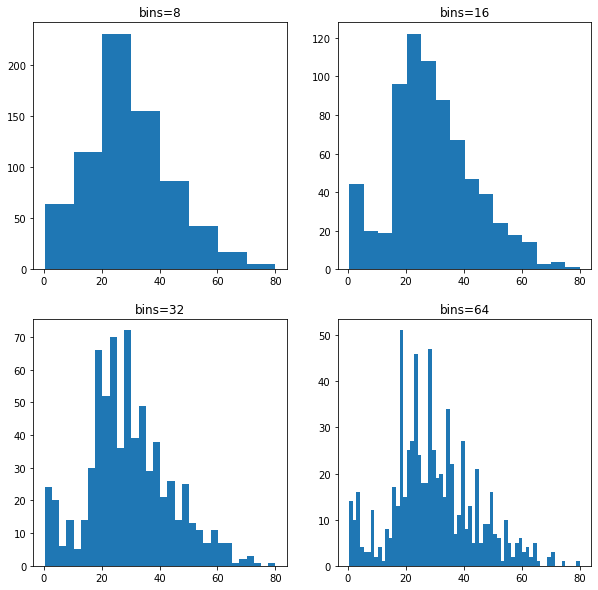

In [47]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title('bins=8')
plt.hist(titanic.Age,bins=8)

plt.subplot(2,2,2)
plt.title('bins=16')
plt.hist(titanic.Age,bins=16)

plt.subplot(2,2,3)
plt.title('bins=32')
plt.hist(titanic.Age,bins=32)

plt.subplot(2,2,4)
plt.title('bins=64')
plt.hist(titanic.Age,bins=64)

[문제2] Age에 칼럼에 대해 히스토그램을 그릴때, 빈도수와 구간값을 살펴 봅시다.
* bins = 8

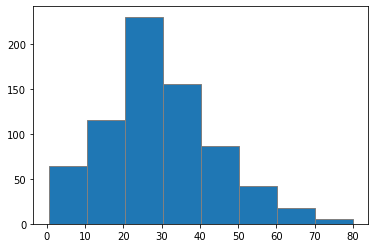

In [48]:
# Age에 칼럼에 대해 히스토그램을 그릴때, 
# 빈도수와 구간값을 살펴 봅시다.
hist2 = plt.hist(titanic.Age,bins=8,edgecolor='gray')

## (2) 밀도함수 그래프

* 히스토그램의 단점 
    * 구간bin의 너비를 어떻게 잡는지에 따라 전혀 다른 모양이 될 수 있음

* 밀도함수 그래프
    * 막대의 너비를 가정하지 않고 모든 점에서 데이터의 밀도를 추정하는 커널 밀도 추정(Kernel Density Estimation)방식을 사용하여 이러한 단점을 해결.
    * 밀도함수 그래프 아래 면적은 1

1) 밀도함수 그래프 그리기

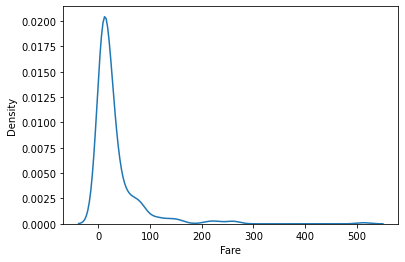

In [49]:
sns.kdeplot(titanic['Fare'])
plt.show()

* 밀도 추정
    * 측정된(관측된) 데이터로부터 전체 데이터 분포의 특성을 추정
    * 예를 들어… OO역 사거리 일일 교통량을 측정한다고 해 봅시다.
        * 어제는 1200대 차량이 통과했고, 오늘은 1420대, 내일은, 모레는…
        * 이렇게 3개월간 매일 측정했다고 할 때, 
        * 우리는 약 90일치의 데이터를 가지고 일일 교통량 분포를 히스토그램으로 그려볼 수 있습니다. 
        * 그리고 나서 특정한 날의 교통량이 얼마나 될지 확률로 나타냄.



<img src='https://github.com/DA4BAM/image/blob/main/%EB%B0%80%EB%8F%84%EC%B6%94%EC%A0%95.png?raw=true' width=800/>

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

titanic Age에 대해서 밀도함수 그래프를 그려봅시다.  

히스토그램과 어떤 차이가 있나요?

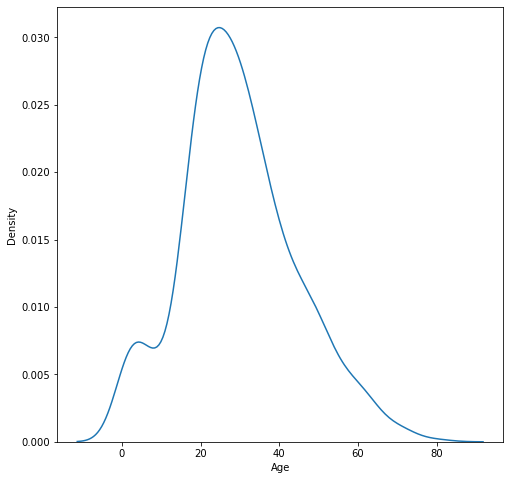

In [50]:
plt.figure(figsize=(8,8))
sns.kdeplot(titanic.Age)
plt.show()

## (3) boxplot

**주의사항** : 값에 **nan**이 있으면 그래프가 그려지지 않습니다.

1) boxplot 기본

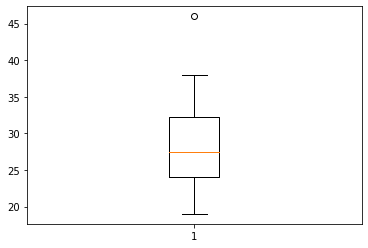

In [51]:
age = [19,20,23,46,21,25,26,25,28,31,37,24,28,34,38,33,32,29,27,24]
plt.boxplot(age)
plt.show()

# 이상치 outliers는 , 이상치일지도 모른다는 추측이지 확실한 의미가 아님. 

2) 옆으로 그리기

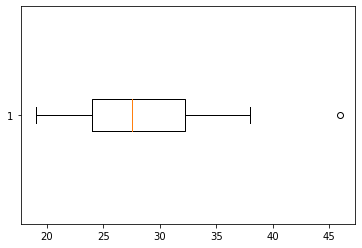

In [52]:
age = [19,20,23,46,21,25,26,25,28,31,37,24,28,34,38,33,32,29,27,24]
plt.boxplot(age, vert = False)
plt.show()

**박스플롯의 의미**

<img src='https://github.com/DA4BAM/image/blob/main/%EB%B0%95%EC%8A%A4%ED%94%8C%EB%A1%AF1.png?raw=true' width=600/>

<img src='https://github.com/DA4BAM/image/blob/main/%EB%B0%95%EC%8A%A4%ED%94%8C%EB%A1%AF2.png?raw=true' width=800/>


3) 박스플로의 값들 가져오기

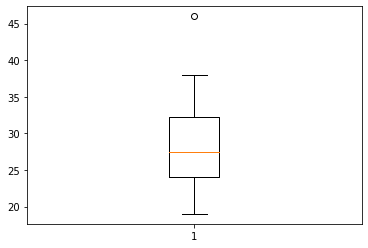

<class 'dict'>
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
--------------------------------------------------
[<matplotlib.lines.Line2D object at 0x000001D84C6A26D0>, <matplotlib.lines.Line2D object at 0x000001D84C6A2A30>]
[24. 19.]
[32.25 38.  ]


In [53]:
age = [19,20,23,46,21,25,26,25,28,31,37,24,28,34,38,33,32,29,27,24]
box1 = plt.boxplot(age)
plt.show()

print(type(box1))
print(box1.keys())
print('-'* 50)
print(box1['whiskers'])
print(box1['whiskers'][0].get_ydata()) # 아래쪽 수염의 max, min
print(box1['whiskers'][1].get_ydata()) # 위쪽 수염의 min, max

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

titanic의 Age와 Fare에 대해서 각각 박스 플롯을 그리고 해석해 봅시다.

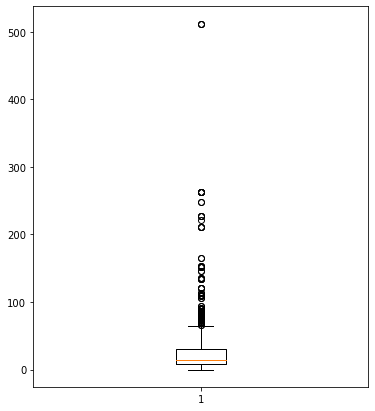

In [59]:
# Fare
plt.figure(figsize=(6,7))
plt.boxplot(titanic['Fare'])
plt.show()

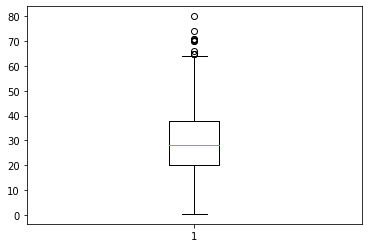

In [61]:
# Age
# nan이 있으면 박스플롯이 그려지지 않습니다. nan을 제외하고 그리시오.
# nan 제외 : .notnull()
tmp = titanic.loc[titanic['Age'].isna()==False]
plt.boxplot(tmp['Age'])
plt.show()

[20.125  0.42 ]
[38. 64.]


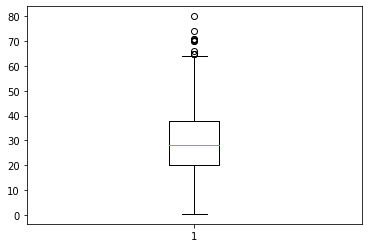

In [70]:
# Age : boxplot의 수염(whiskers)의 길이를 손으로 계산해 봅시다.

box = plt.boxplot(tmp['Age'])
print(box['whiskers'][0].get_ydata())# 아래쪽 수염의 max, min
print(box['whiskers'][1].get_ydata()) # 위쪽 수염의 min, max

## (4) 시계열 데이터 시각화

시계열 데이터는 보통 시간 축(x축)에 맞게 값들을 라인차트로 표현합니다.

In [3]:
air['Date'] 

0      1973-05-01
1      1973-05-02
2      1973-05-03
3      1973-05-04
4      1973-05-05
          ...    
148    1973-09-26
149    1973-09-27
150    1973-09-28
151    1973-09-29
152    1973-09-30
Name: Date, Length: 153, dtype: object

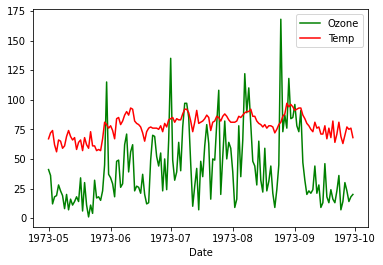

In [4]:
air['Date'] = pd.to_datetime(air['Date']) # 날짜 형식으로 변환

plt.plot('Date', 'Ozone', 'g-', data = air, label = 'Ozone')
plt.plot('Date', 'Temp', 'r-', data = air, label = 'Temp')

plt.xlabel('Date')
plt.legend()
plt.show()

In [5]:
air['Date']

0     1973-05-01
1     1973-05-02
2     1973-05-03
3     1973-05-04
4     1973-05-05
         ...    
148   1973-09-26
149   1973-09-27
150   1973-09-28
151   1973-09-29
152   1973-09-30
Name: Date, Length: 153, dtype: datetime64[ns]

# 4.종합실습

airquality 데이터의 다음 변수들에 대해 기초통계량과 시각화로 데이터를 분석하시오.

**[airquality 데이터 셋 정보]**

- Ozone: 오존 농도  
- Solar.R: 태양복사량
- Wind: 풍속
- Temp: 기온
- Month: 월
- Day: 일

① Ozone

In [48]:
air['Ozone'].describe()

count    153.000000
mean      42.052288
std       30.156127
min        1.000000
25%       20.000000
50%       34.000000
75%       59.000000
max      168.000000
Name: Ozone, dtype: float64

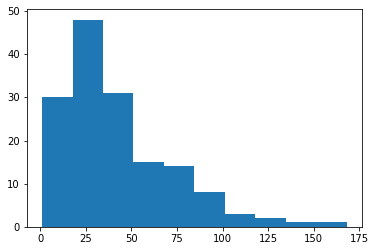

In [54]:
plt.hist(air.Ozone,bins=10)
plt.show()

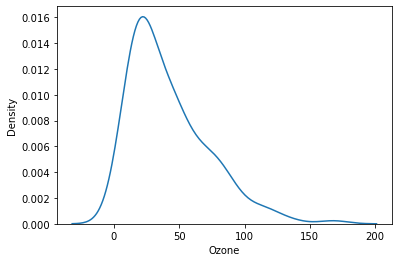

In [55]:
sns.kdeplot(air.Ozone)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1fe9310c850>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe931041c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe9320c6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fe933b6400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fe933b6b20>],
 'means': []}

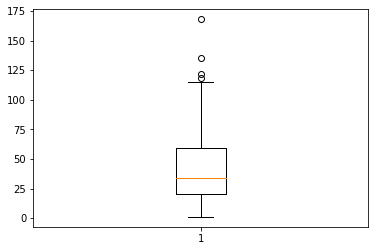

In [56]:
plt.boxplot(air.Ozone)

② Temp

In [59]:
air['Temp'].describe()

count    153.000000
mean      77.882353
std        9.465270
min       56.000000
25%       72.000000
50%       79.000000
75%       85.000000
max       97.000000
Name: Temp, dtype: float64

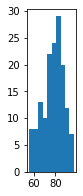

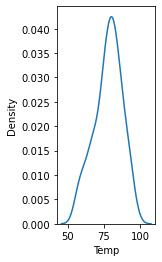

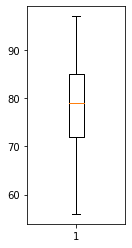

In [77]:
plt.figure(figsize=(3,3))

plt.subplot(1,3,1)
plt.hist(air['Temp'],bins=10 )
plt.show()

plt.subplot(1,3,2)
sns.kdeplot(air['Temp'])
plt.show()

plt.subplot(1,3,3)
plt.boxplot(air['Temp'])
plt.show()

<AxesSubplot:xlabel='Temp', ylabel='Density'>

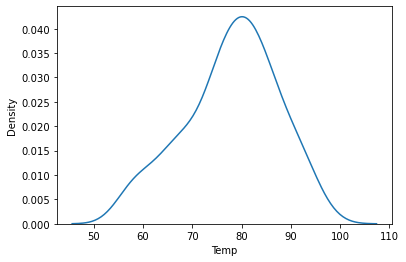

In [61]:
sns.kdeplot(air['Temp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fe94378790>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe94378df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe94378430>],
 'medians': [<matplotlib.lines.Line2D at 0x1fe9434c4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fe9434c850>],
 'means': []}

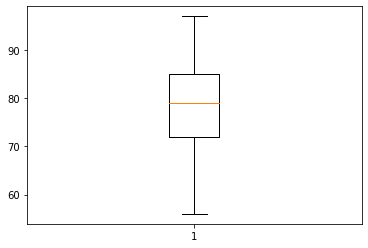

In [62]:
plt.boxplot(air['Temp'])

③ Wind

In [74]:
# .T : transpose (전치행렬) ex. 8행 1열짜리 데이터 프레임을 1행 8열짜리로 바꿔준다고 생각하면 됨. 
air[['Wind']].describe().T

,count,mean,std,min,25%,50%,75%,max
Wind,153.0,9.957516,3.523001,1.7,7.4,9.7,11.5,20.7


(array([ 4.,  9., 20., 37., 30., 22., 21.,  7.,  1.,  2.]),
 array([ 1.7,  3.6,  5.5,  7.4,  9.3, 11.2, 13.1, 15. , 16.9, 18.8, 20.7]),
 <BarContainer object of 10 artists>)

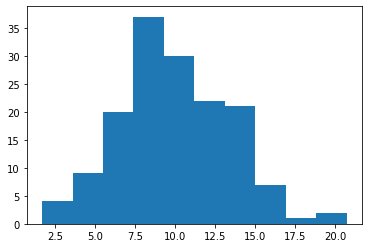

In [67]:
plt.hist(air['Wind'],bins=10)

<AxesSubplot:xlabel='Wind', ylabel='Density'>

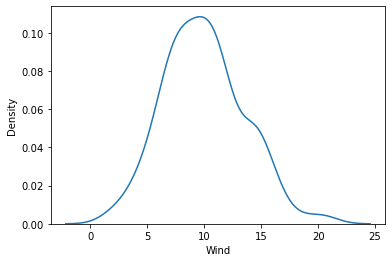

In [68]:
# 확률 밀도함수는 면적만 의미를 가짐. 
sns.kdeplot(air['Wind'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fe958a98b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe958a9f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe958a9550>],
 'medians': [<matplotlib.lines.Line2D at 0x1fe958b5670>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fe958b5a00>],
 'means': []}

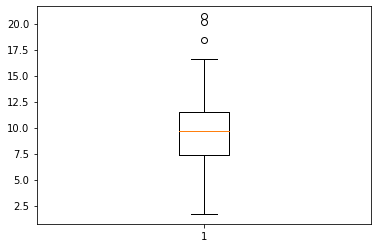

In [69]:
plt.boxplot(air['Wind'])